### 2020-12-24

In [82]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import datasets
%matplotlib inline

In [83]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [84]:
x_train.shape

(60000, 28, 28)

In [85]:
inputs = layers.Input((28, 28, 1))
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(10)(net)  # num_classes
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [86]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = 'sparse_categorical_crossentropy',
                metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [87]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [88]:
np.min(x_train), np.max(x_train)

(0, 255)

In [89]:
x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [90]:
x_train = x_train/255.
x_test = x_test/255.

np.min(x_train), np.max(x_train)

(0.0, 1.0)

In [91]:
model.fit (x_train,y_train,
          batch_size=32,
          shuffle=True,
          epochs=1)

1875/1875 [==============================] - 115s 61ms/step - loss: 0.1507 - sparse_categorical_accuracy: 0.9532


#### evaluate / predict

In [94]:
model.evaluate(x_test,y_test,batch_size=32)

313/313 [==============================] - 3s 10ms/step - loss: 0.0406 - sparse_categorical_accuracy: 0.9858


[0.040622349828481674, 0.98580002784729]

In [99]:
x_test[0,:,:,0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

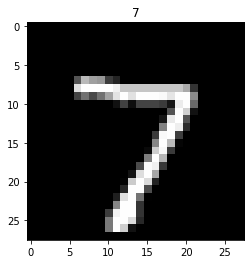

In [102]:
plt.imshow(x_test[0,:,:,0],'gray')
plt.title(y_test[0])
plt.show()

In [105]:
im= x_test[0,:,:,0]

In [106]:
im.shape

(28, 28)

In [107]:
im=im[tf.newaxis,...,tf.newaxis]
im.shape

(1, 28, 28, 1)

In [109]:
pred = model.predict(im)

In [110]:
pred

array([[5.8097149e-10, 4.4303022e-08, 4.6457626e-07, 1.3814947e-05,
        1.0842803e-09, 6.4122246e-10, 1.0704819e-12, 9.9998081e-01,
        3.0712501e-09, 4.9422556e-06]], dtype=float32)

In [111]:
np.argmax(pred)

7

In [125]:
images = x_test[:32]
images.shape

(32, 28, 28, 1)

In [133]:
pred = model.predict(images)
pred.shape

(32, 10)

In [137]:
np.argmax(pred,-1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 5, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1])

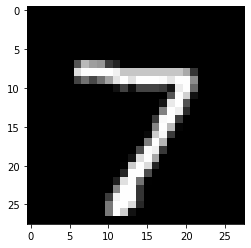

In [144]:
i=0

plt.imshow(images[i,:,:,0],'gray')
plt.show()

#### other method

In [29]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [32]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [36]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [38]:
x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [40]:
np.min(x_train), np.max(x_train)

(0, 255)

In [41]:
np.min(x_test), np.max(x_test)

(0, 255)

In [42]:
x_train = x_train/255.
x_test = x_test/255.

In [48]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test,y_test))
test_ds = test_ds.batch(32)

In [49]:
test_ds

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float64, tf.uint8)>

In [73]:
image, label = next(iter(test_ds))

In [74]:
image.shape, label.shape

(TensorShape([32, 28, 28, 1]), TensorShape([32]))

In [76]:
label = tf.cast(label,dtype=tf.float32)

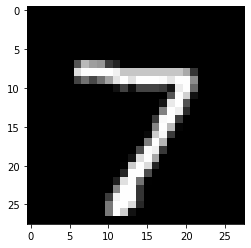

In [77]:
plt.imshow(image[0,:,:,0],'gray')
plt.show()

In [80]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(train_ds, epochs=1)

1875/1875 [==============================] - 120s 64ms/step - loss: 0.0289


In [81]:
model.evaluate(x_test,y_test,batch_size=32)

313/313 [==============================] - 3s 10ms/step - loss: 0.0186


0.01856960728764534